The syntax is taken from [github](https://github.com/maciejkula/glove-python/blob/master/glove/glove.py) and [medium article](https://medium.com/analytics-vidhya/word-vectorization-using-glove-76919685ee0b)

In [2]:
with open("corpus_cleaned.txt", 'r',encoding='utf-8') as f:
    parsed_data=f.read()
len(parsed_data)

1145442

this library is taken from [github](https://github.com/maciejkula/glove-python) and the rest of the syntax is inspired by this [github](https://github.com/naoum-achraf/Arabic-Chatbot/blob/49f475236c2141b93386514fb51971dc4b96902f/WordEmbedding/WordEmbedding.ipynb)

In [ ]:
data_corpus=parsed_data.split("\n")
for sentence_ind in range(len(data_corpus)):
    word_list=data_corpus[sentence_ind].split(" ")
    data_corpus[sentence_ind]=word_list

In [ ]:
! pip install glove-python-binary
! pip install arabic_reshaper
! pip install python-bidi
from glove import Corpus, Glove
from bidi.algorithm import get_display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#parameter tuning
window_list=[10,15, 20]
learning_rate=[0.01,0.05]

[link](https://colab.research.google.com/drive/1y_WThIBWR5X-PQ-H5d1fddH0Tl7yewrj#scrollTo=9DSsC6zb92Rj) , [link2](https://github.com/escherba/flaubert/blob/master/flaubert/pretrain.py)

In [ ]:
#create GLoVE corpus object
corpus = Corpus() 

#train the GLoVE using the ara
corpus.fit(data_corpus, window=10)
# int no_components: number of latent dimensions
glove = Glove(no_components=100, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=10, verbose=True)
glove.add_dictionary(corpus.dictionary)

#corpus.save('corpus.model')
#glove.save('glove.model')

Performing 30 training epochs with 10 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [ ]:
#load all(glove & corpus)
glove1 = Glove.load('glove.model')
corpus_model1 = Corpus.load('corpus.model')
from google.colab import files
files.download('corpus.model') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('glove.model') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
glove.dictionary

In [ ]:
glove.most_similar('مراجع',number=10)

[('المراجع', 0.9182369760125035),
 ('خارجية', 0.9106354965170703),
 ('ملاحظات', 0.8940580689150369),
 ('وصلات', 0.8876852728067905),
 ('روابط', 0.8795613209991238),
 ('خارجي', 0.8322922967700522),
 ('مصادر', 0.8066459028970799),
 ('شصر', 0.7792792967488068),
 ('وبار', 0.7481168653421565)]

In [ ]:
glove.dictionary.keys()

In [ ]:
from gensim.models import KeyedVectors
import gensim
from tqdm import tqdm_notebook as tqdm
import logging
import logging.config
import numpy as np
wv=glove.word_vectors
dict_glove=glove.dictionary
save_word2vec_format(binary=True, fname='glovemodel.bin', vocab=Embedding_dictionary, vector_size=100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
36283 100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/36283 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


In [ ]:
Embedding_dictionary={}
wv=glove.word_vectors
for word in glove.dictionary.keys():
  emb_vector=wv[glove.dictionary[word]] 
  Embedding_dictionary[word]=emb_vector

# format of the GLoVE txt file is taken from https://radimrehurek.com/gensim/scripts/glove2word2vec.html

In [ ]:
# taken from https://www.kaggle.com/code/matsuik/convert-embedding-dictionary-to-gensim-w2v-format
def save_word2vec_format(fname, vocab, vector_size, binary=True):
    """Store the input-hidden weight matrix in the same format used by the original
    C word2vec-tool, for compatibility.

    Parameters
    ----------
    fname : str
        The file path used to save the vectors in.
    vocab : dict
        The vocabulary of words.
    vector_size : int
        The number of dimensions of word vectors.
    binary : bool, optional
        If True, the data wil be saved in binary word2vec format, else it will be saved in plain text.


    """
    
    total_vec = len(vocab)
    with gensim.utils.smart_open(fname, 'wb') as fout:
        print(total_vec, vector_size)
        fout.write(gensim.utils.to_utf8("%s %s\n" % (total_vec, vector_size)))
        # store in sorted order: most frequent words at the top
        for word, row in tqdm(vocab.items()):
            if binary:
                row = row.astype(np.float32)
                fout.write(gensim.utils.to_utf8(word) + b" " + row.tostring())
            else:
                fout.write(gensim.utils.to_utf8("%s %s\n" % (word, ' '.join(repr(val) for val in row))))

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('glovemodel.bin', binary=True)

In [ ]:
model.doesnt_match(['الشريعة','مبايعتها','مراجع'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'الشريعة'

In [ ]:
sentence1="اقرب مدرسة باتجاه الشمال الشرقي"
sentence2="اقرب منزل باتجاه الشمال الشرقي"

model.wmdistance(sentence1,sentence2)

0.012971852428957839

In [ ]:
model.most_similar(positive=["سوريا","العاصمة"], negative=["الدولة"], topn=10)

[('جبال', 0.9194415807723999),
 ('ولبنان', 0.9041147232055664),
 ('نيويورك', 0.8959730267524719),
 ('الروماني', 0.8920433521270752),
 ('وسوريا', 0.8917664885520935),
 ('بنية', 0.8898214101791382),
 ('نفط', 0.886930525302887),
 ('حيوان', 0.8861987590789795),
 ('بلدية', 0.8844066262245178),
 ('مركزا', 0.8836406469345093)]

#### Functions Definition

In [3]:
#this function removes the persentage from the tuple and just keeps the similar words in a list
def extract_word_only(similar_words_vector):
    list_similar_words=[]
    for word,prob in similar_words_vector:
        list_similar_words.append(word)
    return list_similar_words

In [4]:
# create a function that creates a dataframe for each word embedding and 2 last column 
#0 (if original word), 1 (if similar words)
# the last column is the text word as string
def drawTSNE(model,EmbSize, w_original, w_similar):
    # Step1: create embedding dataframe
    ## create a nested list 
    data_list = []
    word_text=[]
    legend_text=[]
    ##push word embedding for w_original 
    word_text.append(w_original)
    legend_text.append("Original")
    org_wordEmb = wv[w_original].tolist()
    org_row=org_wordEmb
    data_list.append(org_row)
    ##push word embedding for w_similar
    for word in w_similar:
        word_text.append(word)
        legend_text.append("Similar")
        similar_wordEmb=wv[word].tolist()
        similar_row=similar_wordEmb
        data_list.append(similar_row)
    #print(len(data_list)) = 11 words(1 org and 10 similar words)
    

    ##convert the nested list
    
    ### create the column vector
    columns=[0]*(EmbSize)#300 elements
    for i in range(EmbSize):#indx=0-229 , aka fill-in 300
        columns[i]="Emb"+str(i+1)
    np_columns=np.array(columns,dtype=str)
    
    
    ### convert the nested list to numpy array then to pandas dataframe
    #(note) the expected size (rows(i.e. words) = 11, columns(i.e. embedding_mat+label) = 301)
    data_nparray= np.array(data_list,dtype=float)
    
    df = pd.DataFrame(data_nparray, columns=columns)
    df_labeled=df
    df_labeled['Word']=legend_text
    ## fix the way arabic printed backwards letters using arabic_reshaper
    word_reshaped = [get_display(arabic_reshaper.reshape(word)) for word in word_text]

    
    
    
    #Step2: 
    tsne = TSNE(n_components=2, perplexity=40, n_iter=300,init='random',learning_rate='auto')
    tsne_results = tsne.fit_transform(df.iloc[:,:-1])
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    fig, ax = plt.subplots()
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="Word",
        data=df_labeled
    )
    plt.grid()
    plt.title('T-SNE of the Keyword and its similar words')
    # Set x-axis label
    plt.xlabel('T-SNE X-axis ')
    # Set y-axis label
    plt.ylabel('T-SNE Y-axis')
    for i, txt in enumerate(word_reshaped):
        ax.annotate(txt, (df['tsne-2d-one'].iloc[i], df['tsne-2d-two'].iloc[i]))



##Test 1: Most Similar Words
Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively. [link](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html#gensim.models.Word2Vec.most_similar)<br>
- Pick 8 Arabic words and, for each one, ask each model about
the **most similar 10 words to it. Plot the results using t-SNE** (or scatterplot) and discuss
them
<hr>

<strong>Syntax</strong> <br>
[documentation](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html#gensim.models.Word2Vec.most_similar)
<br>
Word2Vec.most_similar(positive=[], negative=[], topn=10, restrict_vocab=None, indexer=None)

**Phase 2: Test the following 8 arabic words**
1. مراجع
2. الإسلامية
3. ابن
4. يوم
5. عقد
6. كبيرة
7. وجود

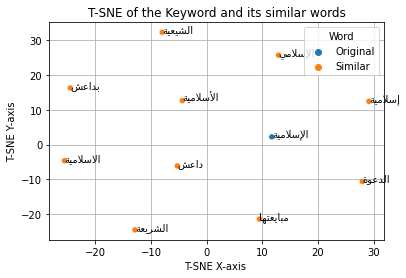

In [38]:
#word1 : مراجع
similar_words_vector=wv.most_similar(positive=["مراجع"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "مراجع",similar_words )
similar_words_vector

In [35]:
#word2 :الإسلامية
similar_words_vector=wv.most_similar(positive=["الإسلامية"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "الإسلامية",similar_words )
similar_words_vector

[('الاسلامية', 0.7955662608146667),
 ('الأسلامية', 0.6608451008796692),
 ('الإسلامي', 0.6469407081604004),
 ('الشريعة', 0.6326825618743896),
 ('إسلامية', 0.5891441702842712),
 ('بداعش', 0.5887125134468079),
 ('مبايعتها', 0.5789318084716797),
 ('الدعوة', 0.5779323577880859),
 ('داعش', 0.5721006393432617),
 ('الشيعية', 0.5647082328796387)]

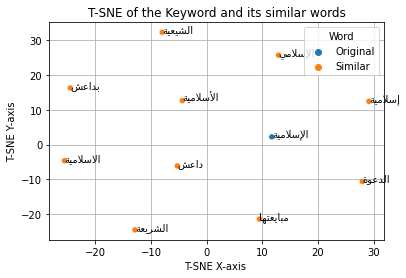

In [38]:
#word3 : ابن

similar_words_vector=wv.most_similar(positive=["ابن"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "ابن",similar_words )
similar_words_vector

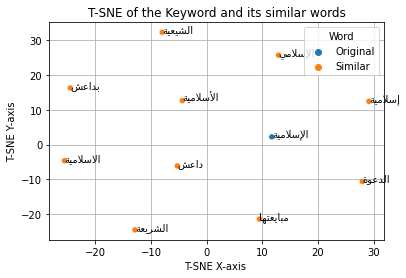

In [38]:
#word4 : يوم
similar_words_vector=wv.most_similar(positive=["يوم"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "يوم",similar_words )
similar_words_vector

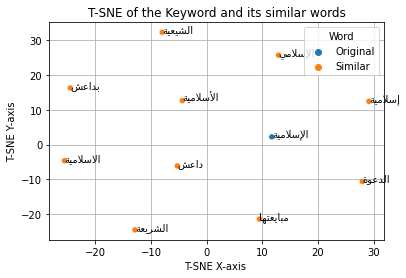

In [38]:
#word5 : عقد
similar_words_vector=wv.most_similar(positive=["الإمارات"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "عقد",similar_words )
similar_words_vector

In [35]:
#word6 :كبيرة
similar_words_vector=wv.most_similar(positive=["كبيرة"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "كبيرة",similar_words )
similar_words_vector

[('الاسلامية', 0.7955662608146667),
 ('الأسلامية', 0.6608451008796692),
 ('الإسلامي', 0.6469407081604004),
 ('الشريعة', 0.6326825618743896),
 ('إسلامية', 0.5891441702842712),
 ('بداعش', 0.5887125134468079),
 ('مبايعتها', 0.5789318084716797),
 ('الدعوة', 0.5779323577880859),
 ('داعش', 0.5721006393432617),
 ('الشيعية', 0.5647082328796387)]

In [35]:
#word7 :وجود
similar_words_vector=wv.most_similar(positive=["الإسلامية"])
similar_words=extract_word_only(similar_words_vector)

drawTSNE(wv,300, "الإسلامية",similar_words )
similar_words_vector

[('الاسلامية', 0.7955662608146667),
 ('الأسلامية', 0.6608451008796692),
 ('الإسلامي', 0.6469407081604004),
 ('الشريعة', 0.6326825618743896),
 ('إسلامية', 0.5891441702842712),
 ('بداعش', 0.5887125134468079),
 ('مبايعتها', 0.5789318084716797),
 ('الدعوة', 0.5779323577880859),
 ('داعش', 0.5721006393432617),
 ('الشيعية', 0.5647082328796387)]

## Test2: Odd-One-Out
- we ask our model to give us the word that does not belong to the list [doc](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html#gensim.models.Word2Vec.doesnt_match)
<br>
- TASK: pick **5-10 triplets** of Arabic words and, for each one, ask each model to
pick the word in the triplet that does not belong to it. Discuss the results.

In [39]:
#triplet 1
diff=wv.doesnt_match(['الشريعة','مبايعتها','مراجع'])

similar_words=['الشريعة','مبايعتها']

drawTSNE(wv,300, diff,similar_words)

'مراجع'

In [39]:
#triplet 2
diff=wv.doesnt_match(['الشريعة','سنة','يوم'])

similar_words=['سنة','يوم']

drawTSNE(wv,300, diff,similar_words)

'مراجع'

In [39]:
#triplet 3
diff=wv.doesnt_match(['أغسطس','ديسمبر','دور'])

similar_words=['أغسطس','ديسمبر']

drawTSNE(wv,300, diff,similar_words)

'مراجع'

In [39]:
#triplet 4
diff=wv.doesnt_match(['العلمي','مصادر','سطح'])

similar_words=['العلمي','مصادر']

drawTSNE(wv,300, diff,similar_words)

'مراجع'

In [39]:
#triplet 5
diff=wv.doesnt_match(['حرب','سلام','العسكرية'])

similar_words=['حرب','سلام']

drawTSNE(wv,300, diff,similar_words)

'مراجع'

## Test3: Measuring Sentence Similarity
Find the Sentences similar to each other by computing the **cosine similarity** function of the two embedding vectors as in [Paul Minogue blog](https://paulminogue.com/index.php/2019/09/29/introduction-to-cosine-similarity/)<br>
Note : **pyemd is a dependency of wmdistance**


<br>write **5 sentences in Arabic**. For each sentence, **pick 2-3
words and replace them with their synonyms or antonyms**. Use your embeddings to
compute the similarity between each sentence and its modified version. Discuss the
results

In [ ]:
sentence1="اقرب منزل باتجاه الشمال الغربي"
sentence2="اقرب منزل باتجاه الشمال الشرقي"

similarity = wv.wmdistance(sentence1,sentence2)

In [ ]:
sentence1="ابعد منزل باتجاه الجنوب الشرقي"
sentence2="اقرب منزل باتجاه الشمال الشرقي"

similarity = wv.wmdistance(sentence1,sentence2)

In [ ]:
sentence1="الامارات العربية المتحدة تقع في العالم العربي"
sentence2=" الولايات المتحدة تقع في العالم الغربي"

similarity = wv.wmdistance(sentence1,sentence2)

In [ ]:
sentence1="تتكون السنة من شهور"
sentence2="تتكون الشهر من اسابيع"

similarity = wv.wmdistance(sentence1,sentence2)

In [40]:
sentence2="اقرب مدرسة باتجاه الشمال الشرقي""
sentence2="اقرب منزل باتجاه الشمال الشرقي"


similarity = wv.wmdistance(sentence1,sentence2)

KeyError: "Key 'homer' not present"

## Test4: Analogy
- Syntax in [link](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.doesnt_match.html#gensim.models.Word2Vec.doesnt_match)
- pick 5-10 cases of analogies in Arabic, like the one we used in class:

In [ ]:
#Anallogy1
wv.most_similar(positive=["يناير", "ثلاثة"], negative=["مارس"], topn=10)

In [41]:
#Anallogy2
wv.most_similar(positive=["مصر","الأمريكية"], negative=["أمريكا"], topn=10)

[('للرئيس', 0.5080066323280334),
 ('باراك', 0.49067333340644836),
 ('كوزيرة', 0.48039859533309937),
 ('يوكوتا', 0.47324714064598083),
 ('أوباما', 0.4669496417045593),
 ('كمرشحة', 0.46538347005844116),
 ('للمرشحة', 0.4591633081436157),
 ('بوزيرة', 0.456716924905777),
 ('إعتذرت', 0.45361462235450745),
 ('مهريبان', 0.45299050211906433)]

In [41]:
#Anallogy3
wv.most_similar(positive=["سوريا","العاصمة"], negative=["الدولة"], topn=10)

[('للرئيس', 0.5080066323280334),
 ('باراك', 0.49067333340644836),
 ('كوزيرة', 0.48039859533309937),
 ('يوكوتا', 0.47324714064598083),
 ('أوباما', 0.4669496417045593),
 ('كمرشحة', 0.46538347005844116),
 ('للمرشحة', 0.4591633081436157),
 ('بوزيرة', 0.456716924905777),
 ('إعتذرت', 0.45361462235450745),
 ('مهريبان', 0.45299050211906433)]

In [41]:
#Anallogy4
wv.most_similar(positive=["قصيرة", "الكبيرة"], negative=["صغيرة"], topn=10)

[('للرئيس', 0.5080066323280334),
 ('باراك', 0.49067333340644836),
 ('كوزيرة', 0.48039859533309937),
 ('يوكوتا', 0.47324714064598083),
 ('أوباما', 0.4669496417045593),
 ('كمرشحة', 0.46538347005844116),
 ('للمرشحة', 0.4591633081436157),
 ('بوزيرة', 0.456716924905777),
 ('إعتذرت', 0.45361462235450745),
 ('مهريبان', 0.45299050211906433)]

In [41]:
#Anallogy5
wv.most_similar(positive=["أمريكا", "شرق"], negative=["العرب"], topn=10) #الوطنية

[('للرئيس', 0.5080066323280334),
 ('باراك', 0.49067333340644836),
 ('كوزيرة', 0.48039859533309937),
 ('يوكوتا', 0.47324714064598083),
 ('أوباما', 0.4669496417045593),
 ('كمرشحة', 0.46538347005844116),
 ('للمرشحة', 0.4591633081436157),
 ('بوزيرة', 0.456716924905777),
 ('إعتذرت', 0.45361462235450745),
 ('مهريبان', 0.45299050211906433)]